## A. Data Exploration

The dataset contains information about the obesity classification of individuals. The data was collected from a variety of sources, including medical records, surveys, and self-reported data. The dataset includes the following columns:

**Numerical Features:**

- ID: A unique identifier for each individual
- Age: The age of the individual
- Height: The height of the individual in centimeters
- Weight: The weight of the individual in kilograms
- BMI: The body mass index of the individual, calculated as weight divided by height squared

**Categorical Features:**
- Gender: The gender of the individual

**Target Variable:**
- Label: The obesity classification of the individual, which can be one of the following: normal weight, overweight, obese, and underweight

### Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Desktop/ObesityClassification.csv")

In [3]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
df.tail()

,ID,Age,Gender,Height,Weight,BMI,Label
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight
107,110,31,Male,190,20,8.3,Underweight


The dataset contains 107 rows. There are two categorical attributes (gender and label). There are four numerical attributes (age, height, weight, BMI).

In [6]:
df.shape

(108, 7)

The dataset consists of 107 observations (rows) and 7 features.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [8]:
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

There are no missing values.

In [9]:
# Get column names
column_names = df.columns
print(column_names)

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')


In [10]:
# Also check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

ID is unique: True
Age is unique: False
Gender is unique: False
Height is unique: False
Weight is unique: False
BMI is unique: False
Label is unique: False


ID is unique. Usually, id columns can be dropped.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,108.0,56.046296,31.917939,1.0,28.75,56.5,83.25,110.0
Age,108.0,46.555556,24.720620,11.0,27.00,42.5,59.25,112.0
Height,108.0,166.574074,27.873615,120.0,140.00,175.0,190.00,210.0
Weight,108.0,59.490741,28.856233,10.0,35.00,55.0,85.00,120.0
BMI,108.0,20.549074,7.583818,3.9,16.70,21.2,26.10,37.2


- Means of age and weight are greater than the median. Therefore, distribution is positively skewed (right skewed).
- Means of height and BMI are less than the median. Therefore, distribution is negatively skewed (left skewed).

### Univariate Analysis

### 1. Target Variable

In [12]:
df.Label.unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

The target variable label is discrete and it is a classification problem.

In [13]:
df.Label.value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

- 47 persons are underweight.
- 29 persons are of normal weight.
- 20 persons are overweight.
- 12 persons are obese.

In [14]:
# Normalize can be set to True to print proportions instead of number 
df.Label.value_counts(normalize=True)

Underweight      0.435185
Normal Weight    0.268519
Overweight       0.185185
Obese            0.111111
Name: Label, dtype: float64

- (43.52% + 26.85%) 70.37% of all individuals are either underweight or of naormal weight!
- Roughly 30% of all individuals are wither overweight or obese.

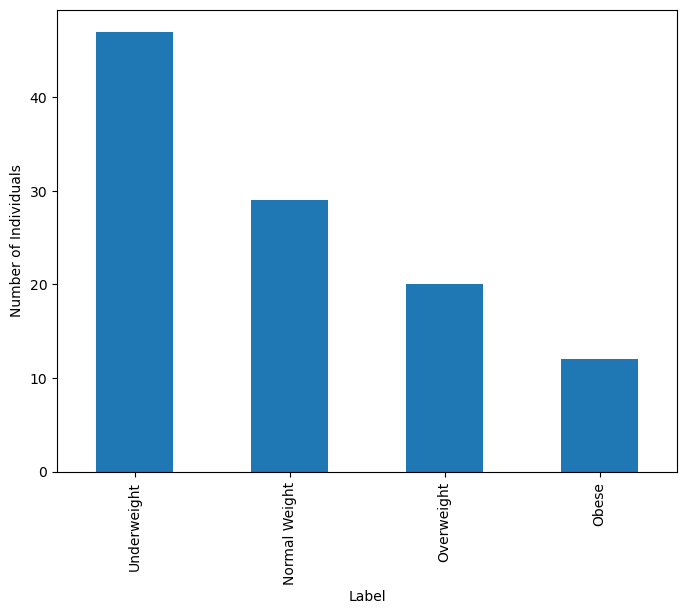

In [15]:
plt.figure(figsize=(8,6))
df.Label.value_counts().plot(kind='bar')
plt.ylabel('Number of Individuals')
plt.xlabel('Label')
plt.show()

The distribution is imbalanced. There are more underweight individuals.

### 2. Independent Variables

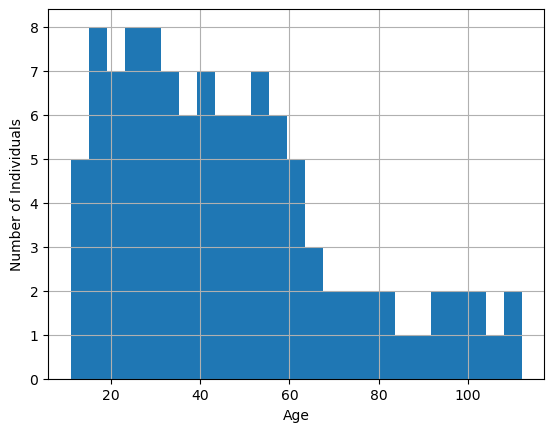

In [16]:
df['Age'].hist(bins=25)
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.show()

- The highest number of individuals falls within the 20 to 60 years bins.
- The age ranges from 10 to 110 years old.

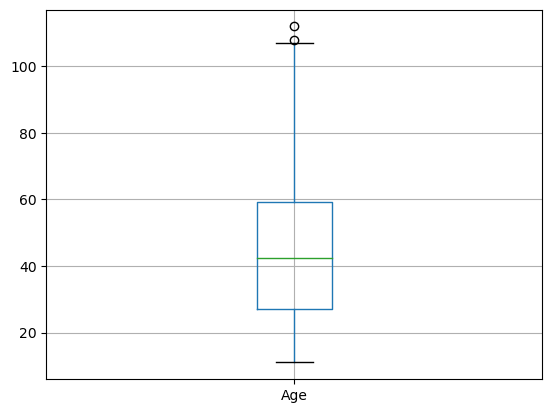

In [17]:
df.boxplot(column='Age')
plt.show()

- 25 % of the individuals are below 28 years old and 75 % are above 28 years old (25 % percentile).
- 50 % of the individuals are below 42 years old and 50 % are above 42 years old (median).
- 75 % of the patients are below 59 years old and 25 % are above 59 years old (75 % percentile).

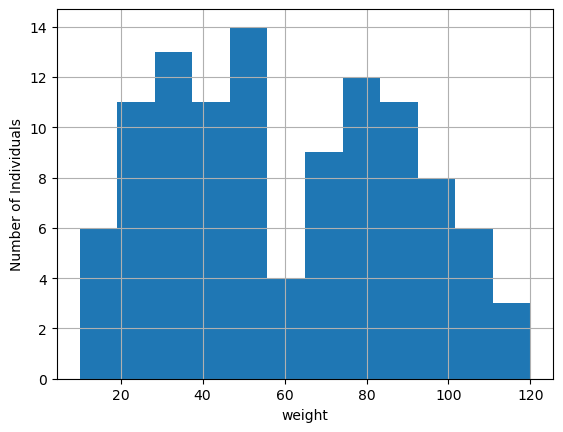

In [18]:
df['Weight'].hist(bins=12)
plt.xlabel('weight')
plt.ylabel('Number of Individuals')
plt.show()

- The highest numbers falls within the 20 to 57 kg bin and 65 and 110 kg bin. 
- The weight ranges from 10 to 120 kg.

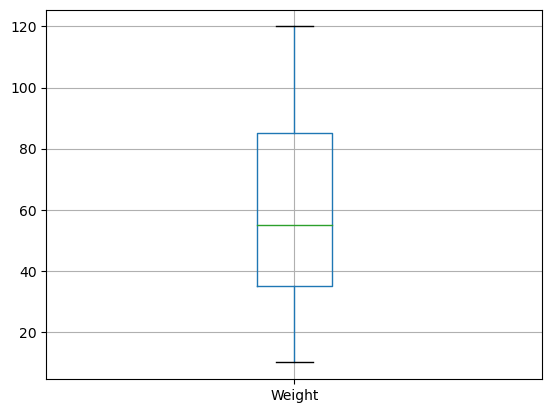

In [19]:
df.boxplot(column='Weight')
plt.show()

- 25 % of the individuals are below 38 kg and 75 % are above 38 kg (25 % percentile).
- 50 % of the individuals are below 58 kg and 50 % are above 58 kg (median).
- 75 % of the patients are below 83 kg and 25 % are above 83 kg (75 % percentile).

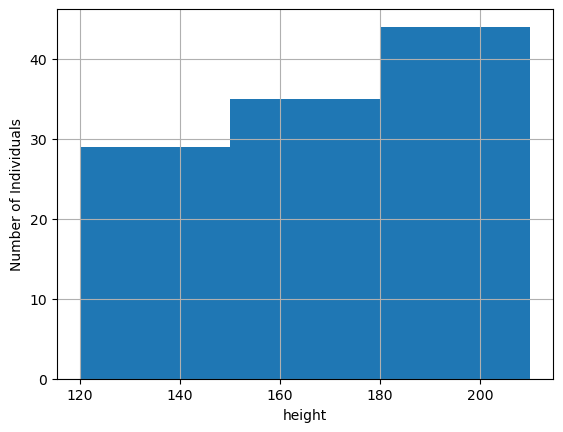

In [20]:
df['Height'].hist(bins=3)
plt.xlabel('height')
plt.ylabel('Number of Individuals')
plt.show()

- The highest number of individuals falls within the 150 to 210 cm bin. 
- The height ranges from under 120 to 210.

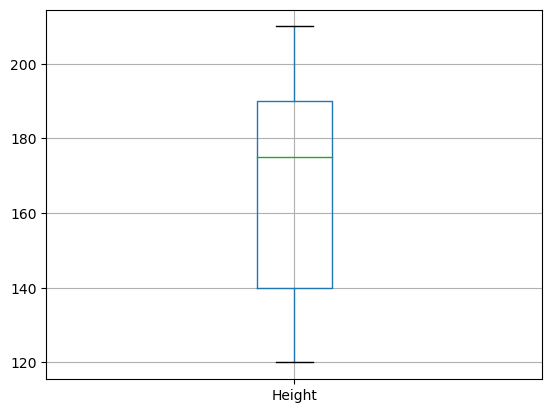

In [21]:
df.boxplot(column='Height')
plt.show()

- 25 % of the individuals are below 140 cm and 75 % are above 140 cm (25 % percentile).
- 50 % of the indivuiduals are below 175 cm and 50 % are above 175 cm (median).
- 75 % of the patients are below 190 cm and 25 % are above 190 cm (75 % percentile).

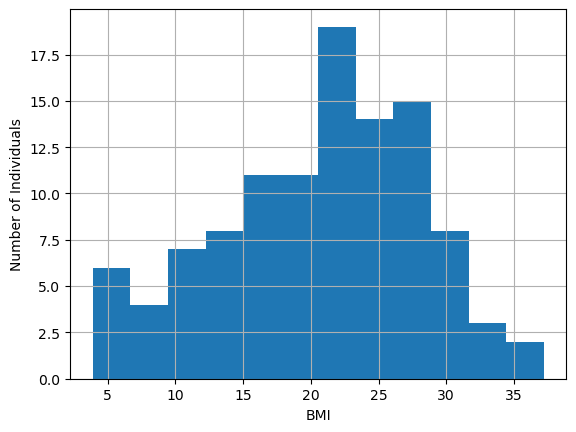

In [22]:
df['BMI'].hist(bins=12)
plt.xlabel('BMI')
plt.ylabel('Number of Individuals')
plt.show()

- The distribution is negatively skewed (left skewed).
- The highest number of individuals falls within the 20 to 28 bin. 
- The bmi ranges from under 5 to 37.5.

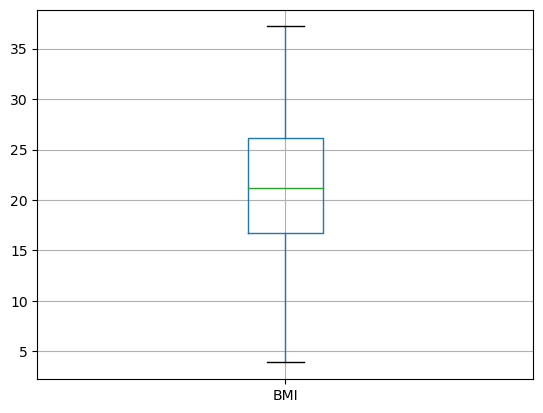

In [23]:
df.boxplot(column='BMI')
plt.show()

- 25 % of the individuals are below 17 and 75 % are above 17 (25 % percentile).
- 50 % of the patients are below 22 and 50 % are above 22 (median).
- 75 % of the patients are below 27 and 25 % are above 27 (75 % percentile).

In [24]:
df.Gender.value_counts()

Male      56
Female    52
Name: Gender, dtype: int64

The number of males (56) and females (52) are almost balanced in the dataset.

### Bivariate Analysis

### Label vs. Age

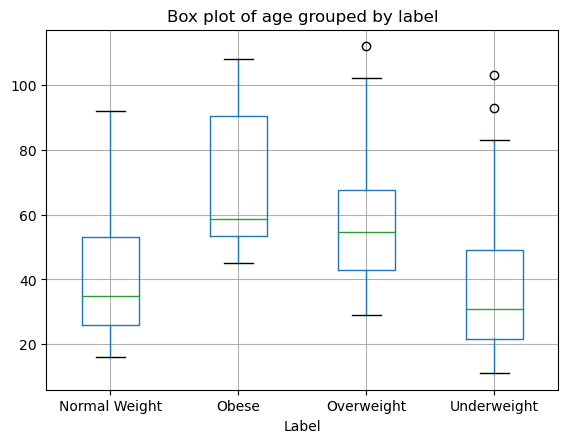

In [25]:
# Boxp lots of age grouped by the categorical attribute status
df.boxplot(column='Age', by='Label')
plt.title('Box plot of age grouped by label')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

- The median age of the individuals that are normal weight or underweight is lower than the median age of the patients that are overweight or obese. Therefore, in average the overweight and obese individuals are older than the indoviduals of normal weight or of underweight.
- There are some outliers with high age for overweight and for underweight individuals.

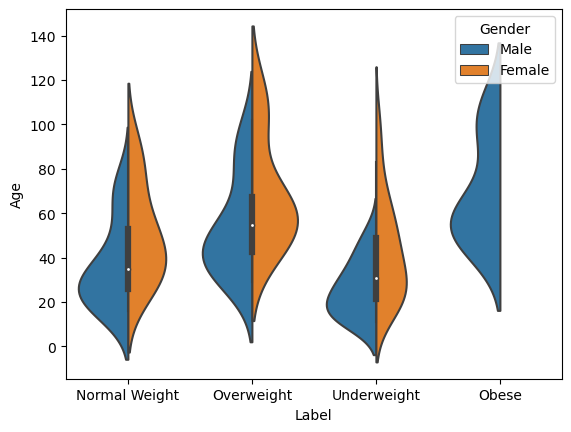

In [26]:
sns.violinplot(data=df, x='Label', y='Age', hue='Gender', split=True)
plt.show()

- It looks like that all obese individuals are male.

### Label vs. Weight

<AxesSubplot:ylabel='Weight'>

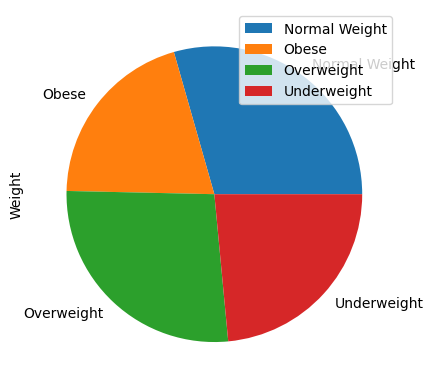

In [27]:
df.groupby(['Label']).sum().plot(kind='pie',y='Weight')

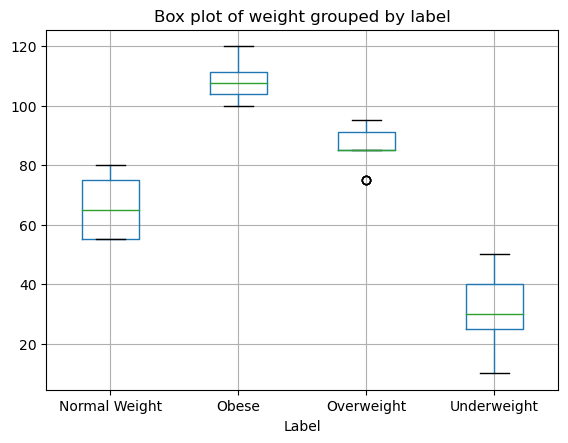

In [28]:
# Boxp lots of weight grouped by the categorical attribute status
df.boxplot(column='Weight', by='Label')
plt.title('Box plot of weight grouped by label')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

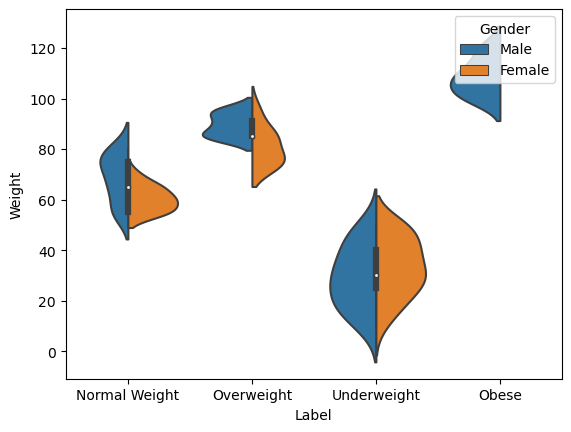

In [29]:
sns.violinplot(data=df, x='Label', y='Weight', hue='Gender', split=True)
plt.show()

### Label vs. BMI

<AxesSubplot:ylabel='BMI'>

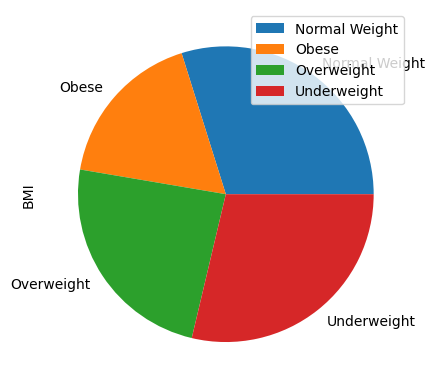

In [30]:
df.groupby(['Label']).sum().plot(kind='pie',y='BMI')

### Splitting Dataset into Subsets

The objective of this study is the influence of the variables on the target variable (if the individual is underweight, of normal weight, overweight, or obese).

We will split the data into two subsets:
- df1 Subset : All samples with value Underweight of label
- df2 Subset: All samples with value Normal Weight of label
- df3 Subset: All samples with value Overweight of label
- df4 Subset: All samples with value Obese of label

In [31]:
df1 = df[df.Label=='Underweight']
df2 = df[df.Label=='Normal Weight']
df3 = df[df.Label=='Overweight']
df4 = df[df.Label=='Obese']

Text(0.5, 1.0, 'Boxplot for Age by Label')

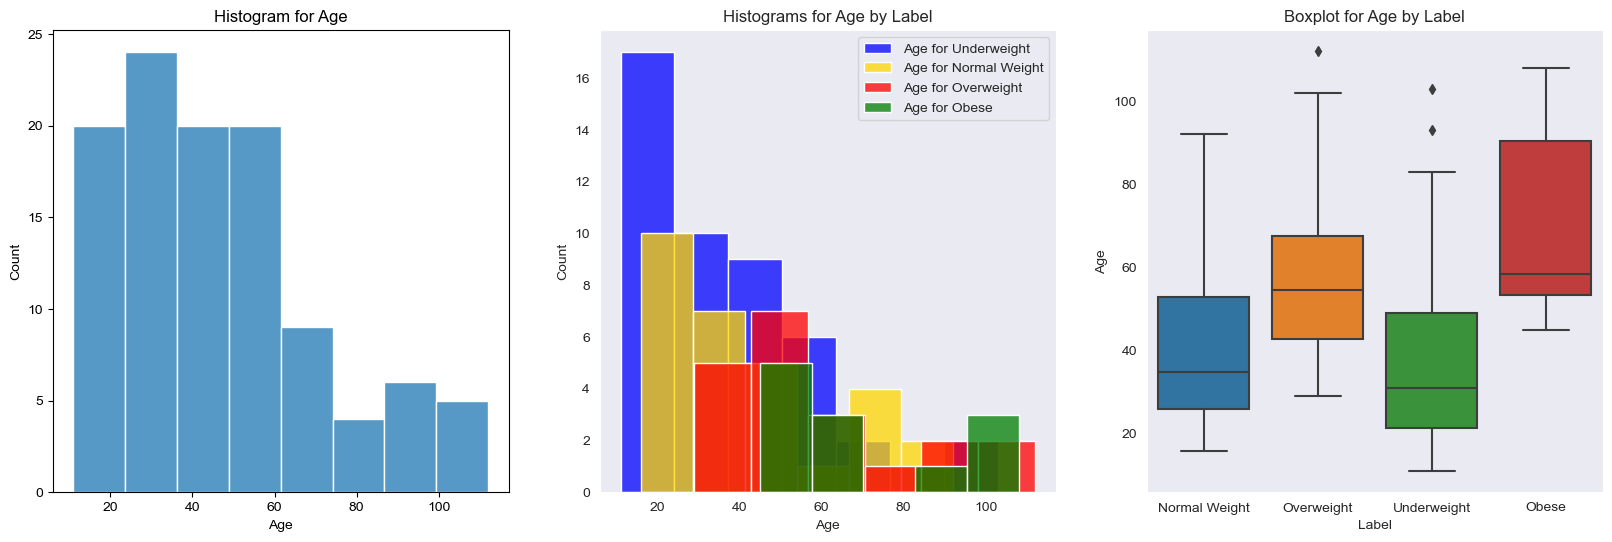

In [32]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Age")
sns.histplot(df.Age,kde=False)
plt.subplot(1,3,2)
sns.histplot(df1.Age,kde=False,color="Blue", label="Age for Underweight")
sns.histplot(df2.Age,kde=False,color = "Gold", label = "Age for Normal Weight")
sns.histplot(df3.Age,kde=False,color = "Red", label = "Age for Overweight")
sns.histplot(df4.Age,kde=False,color = "Green", label = "Age for Obese")
plt.title("Histograms for Age by Label")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.Label,y=df.Age)
plt.title("Boxplot for Age by Label")

- Individuals that are underweight or of normal weight tend to be younger than indoviduals that are overweight or obese.

Text(0.5, 1.0, 'Boxplot for Weight by Label')

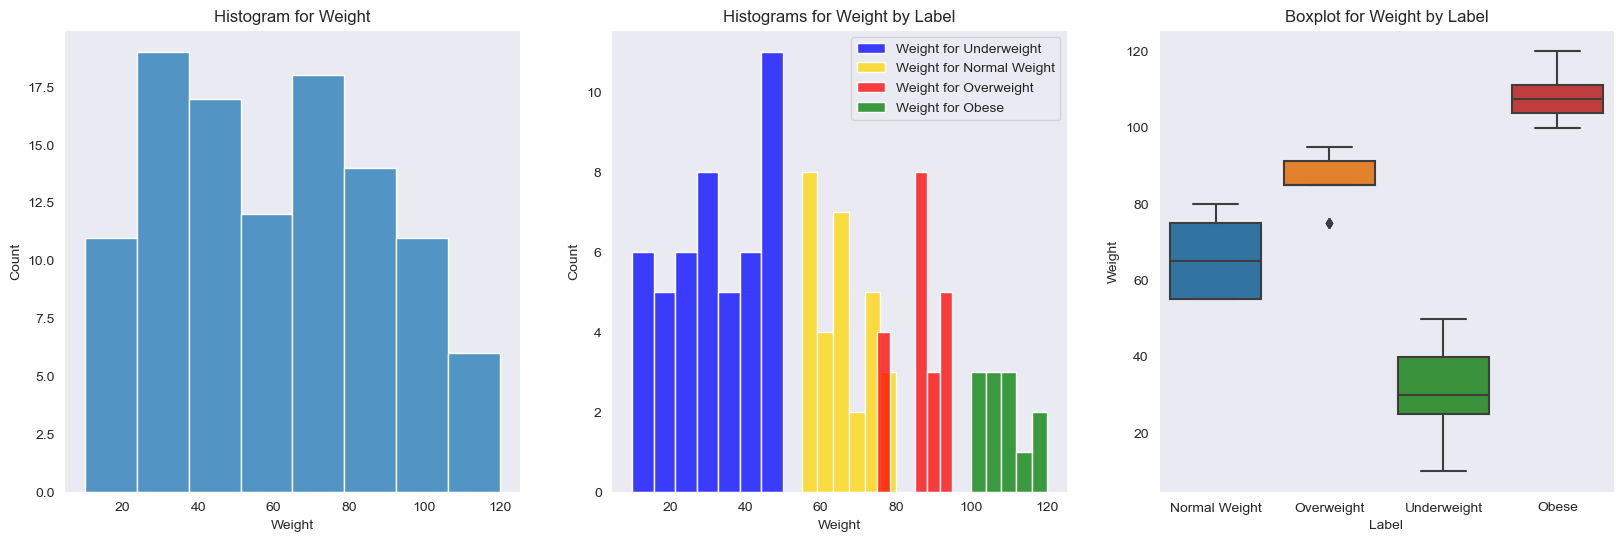

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Weight")
sns.histplot(df.Weight,kde=False)
plt.subplot(1,3,2)
sns.histplot(df1.Weight,kde=False,color="Blue", label="Weight for Underweight")
sns.histplot(df2.Weight,kde=False,color = "Gold", label = "Weight for Normal Weight")
sns.histplot(df3.Weight,kde=False,color = "Red", label = "Weight for Overweight")
sns.histplot(df4.Weight,kde=False,color = "Green", label = "Weight for Obese")
plt.title("Histograms for Weight by Label")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.Label,y=df.Weight)
plt.title("Boxplot for Weight by Label")

Text(0.5, 1.0, 'Boxplot for Height by Label')

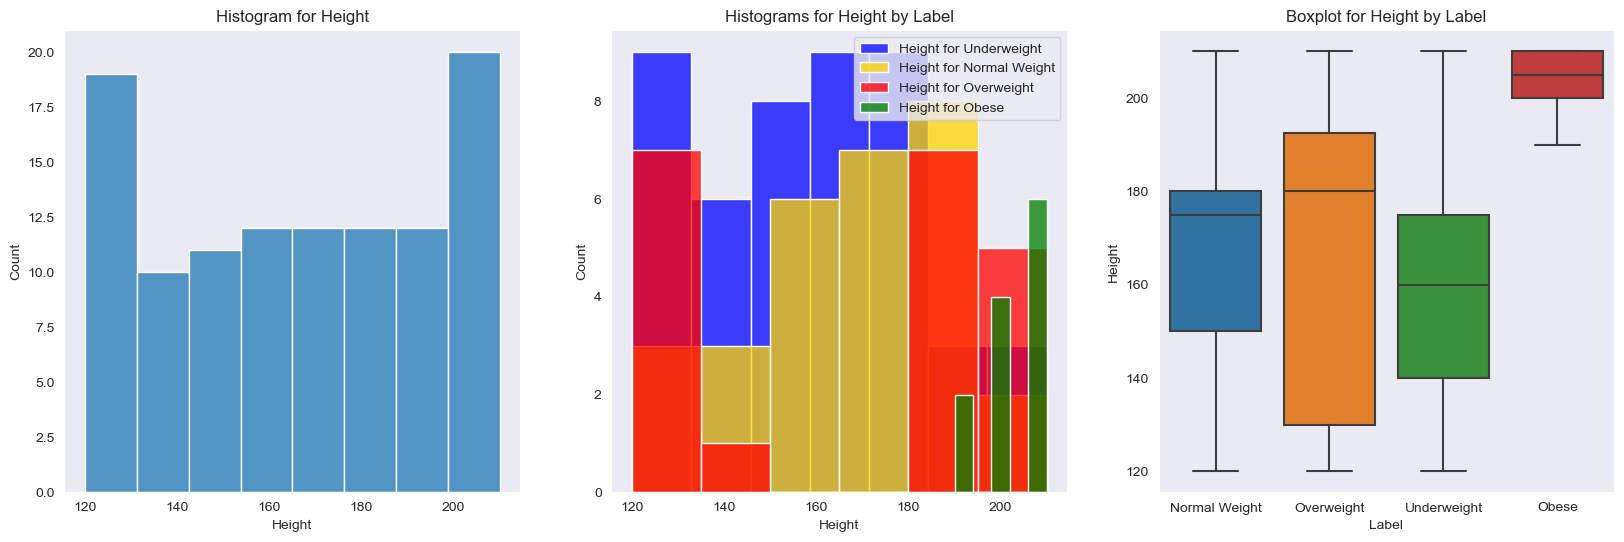

In [34]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Height")
sns.histplot(df.Height,kde=False)
plt.subplot(1,3,2)
sns.histplot(df1.Height,kde=False,color="Blue", label="Height for Underweight")
sns.histplot(df2.Height,kde=False,color = "Gold", label = "Height for Normal Weight")
sns.histplot(df3.Height,kde=False,color = "Red", label = "Height for Overweight")
sns.histplot(df4.Height,kde=False,color = "Green", label = "Height for Obese")
plt.title("Histograms for Height by Label")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.Label,y=df.Height)
plt.title("Boxplot for Height by Label")

- Individuals that are obese tend to be higher than other individuals.

We will split the data into two subsets:
- males Subset : All samples with value male
- females Subset: All samples with value female

In [35]:
males = df[df.Gender == "Male" ]
females = df[df.Gender == "Female" ]

In [36]:
males.describe()

,ID,Age,Height,Weight,BMI
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,55.875000,44.375000,190.000000,71.071429,23.039286
std,32.202802,25.121206,12.720778,30.536331,7.913525
min,1.000000,11.000000,175.000000,10.000000,3.900000
25%,29.500000,25.000000,180.000000,48.750000,19.675000
50%,56.000000,38.500000,190.000000,75.000000,24.200000
75%,83.500000,56.250000,200.000000,95.000000,27.300000
max,110.000000,108.000000,210.000000,120.000000,37.200000


- The mean weight is 71.07 kg. 
- The mean height is 190.00 cm. 
- The mean BMI is 23.04.

In [37]:
females.describe()

,ID,Age,Height,Weight,BMI
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,56.230769,48.903846,141.346154,47.019231,17.867308
std,31.921236,24.304651,14.284071,20.869802,6.244173
min,2.000000,16.000000,120.000000,10.000000,3.900000
25%,28.500000,29.750000,130.000000,30.000000,13.300000
50%,57.000000,45.500000,140.000000,45.000000,18.700000
75%,82.500000,61.250000,150.000000,60.000000,22.500000
max,109.000000,112.000000,160.000000,95.000000,29.100000


- The mean weight is 47.02 kg. 
- The mean height is 141.35 cm. 
- The mean BMI is 17.87.

In [38]:
round(males.Label.value_counts() / len(males) * 100,2)

Normal Weight    30.36
Underweight      26.79
Overweight       21.43
Obese            21.43
Name: Label, dtype: float64

(21.43 + 21.43) 42.86% of all males are either obese or overweight.

In [39]:
round(females.Label.value_counts() / len(females) * 100,2)

Underweight      61.54
Normal Weight    23.08
Overweight       15.38
Name: Label, dtype: float64

61.54% of all females are underweight.

### Multivariate Analysis

<AxesSubplot:>

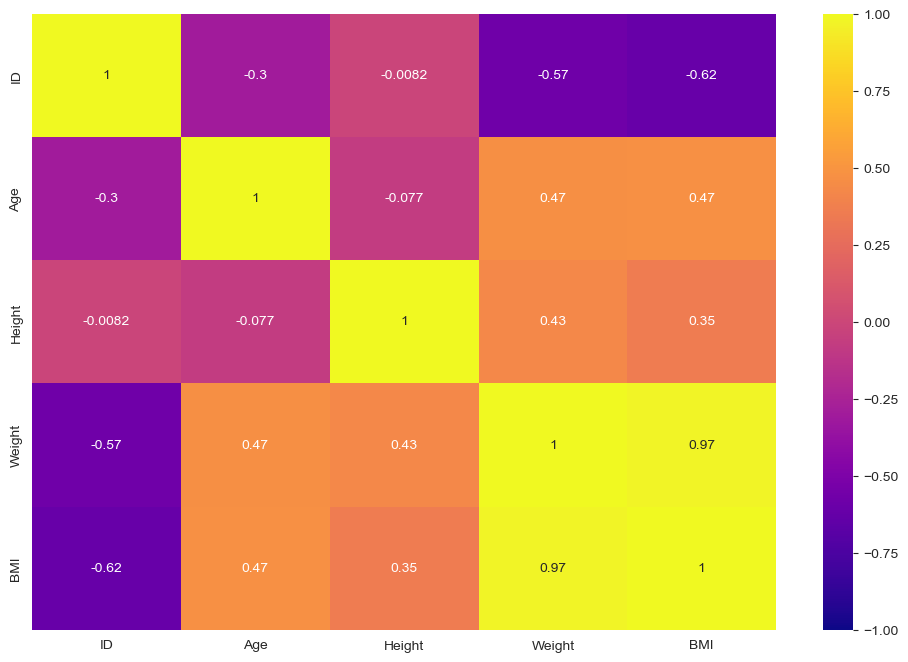

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

The heat map suggests correlation greater than 0 between weight and age (0.47), weight and height (0.43), and height and bmi (0.35).

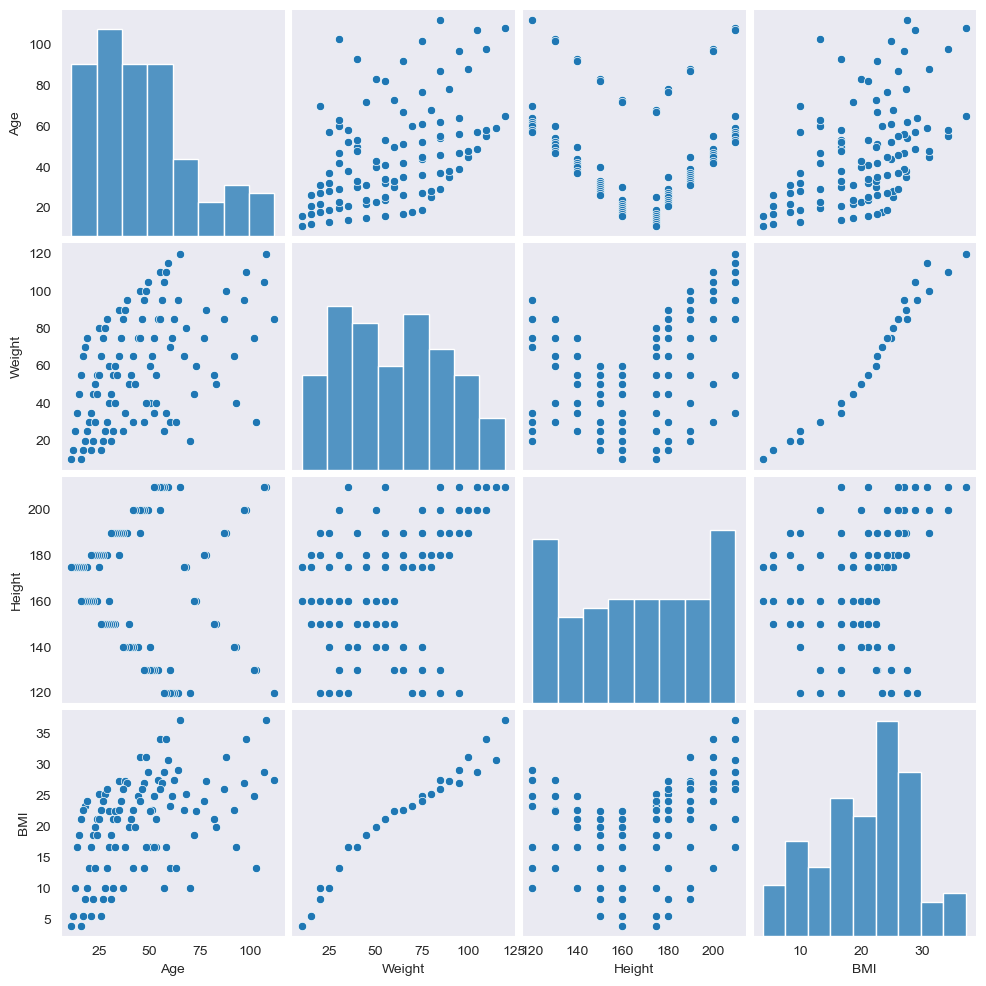

In [41]:
sns.pairplot(data=df[['Age','Weight','Height','BMI']].dropna())
plt.show()

## B. Data Preparation

Columns with ID numbers are unlikely to contain useful information and should be dropped.

In [42]:
df.drop('ID', axis=1, inplace=True)
df.tail()

,Age,Gender,Height,Weight,BMI,Label
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight
107,31,Male,190,20,8.3,Underweight


### Pre-Process Data

In [43]:
mapper = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].replace(mapper)
df['Gender'].value_counts()

1    56
0    52
Name: Gender, dtype: int64

In [44]:
mapper = {'Underweight': 1, 'Normal Weight': 2, 'Overweight': 3, 'Obese': 4}
df['Label'] = df['Label'].replace(mapper)
df['Label'].value_counts()

1    47
2    29
3    20
4    12
Name: Label, dtype: int64

In [45]:
df.tail()

,Age,Gender,Height,Weight,BMI,Label
103,11,1,175,10,3.9,1
104,16,0,160,10,3.9,1
105,21,1,180,15,5.6,1
106,26,0,150,15,5.6,1
107,31,1,190,20,8.3,1


In [46]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,2
1,30,0,160,60,22.5,2
2,35,1,180,90,27.3,3
3,40,0,150,50,20.0,1
4,45,1,190,100,31.2,4


## C. Multiclass Classification

We will attempt to train SVM and Random Forest classifiers. We will tune their parameters, compare them and choose the best classifier for our problem. Here we will prepare a scikit-learn pipeline for data preparation (preprocessing pipeline), which we will apply later. The use of his pipelines ensures that preprocessing is applied separately to any training validation and test dataset without data leakage.

First, we need to prepare two lists of column names. The list `names_outliers` contains the names of the three columns to which we will apply log transformation followed by `RobustScaler`. The list `names_no_outliers` contains the names of all other predictor columns to which we will apply `StandardScaler`.

In [47]:
# store a list with the names of all predictors
names_all = [c for c in df if c not in ['Label']]

# define column groups with same data preparation
names_outliers = ['Age']
names_no_outliers = list(set(names_all) - set(names_outliers))

After splitting a dataset into a training and test datasets, the names of the columns are lost. This is the reason, we stored the names of the columns in lists above. We will use the following class in the preprocessing pipeline to put the names of the columns back. We need this to easily apply the different preparation strategies to the two groups of columns. 

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

Then we need another class to be able to select a particular group of columns.

In [49]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

Finally, we can build the preprocessing pipeline. It first adds the column names back to a set of examples (that can be either a training, or a validation, or test set). Then it applies the two different data preparation strategies to the two groups of columns and unites them with `FeatureUnion`.

In [50]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer

preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_no_outliers),
            StandardScaler()
        ))
    ])
)

### Feature Selection

Now we can separate the columns into *target* and *predictors* and split the dataset into a training and test sets. 

In [51]:
y = df['Label']
X = df.drop('Label', axis=1).values

### Splitting Dataset

We will divide the dataset into a training set and a test set using the function train_test_split() and by passing three parameters: 
- features
- target
- test_set size
- random_state

In [52]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

The parameter `stratify=y` ensures both classes are represented in the same proportion in both the training and the test sets.

Note that after the split into a training and test sets, X_train and X_test are numpy arrays and no longer have column names. That's why we needed the class above to put the names of columns back in the preprocessing pipeline.

### Grid Search for Best Parameters of Classifiers

Next, we train an SVM classifier with the training set and a range of possible parameters in order to find the best parameters for SVM by cross-validation. To do this we will build another pipeline which includes the preprocessing pipeline and the SVM classifier. The pipeline will take care for separately preprocessing the training and validation sets after the training set is further split into training and validation sets in the process of cross-validation.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('svm', svm.SVC(probability=True))])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of svn.SVC and their possible values

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel': ['rbf', 'linear', 'poly']}

model_svm = GridSearchCV(pipe, param_grid, cv=10, refit=True)
model_svm.fit(X_train, y_train)
print("Best CV score = %0.3f:" % model_svm.best_score_)
print("Best parameters: ", model_svm.best_params_)

# store the best params and best model for later use
SVM_best_params = model_svm.best_params_
SVM_best_model = model_svm.best_estimator_

Best CV score = 0.989:
Best parameters:  {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'linear'}


The parameter `refit=True` makes the GridSearchCV train an SVM classifier on the **whole training set** with the best parameters found. This best SVM model can then be accessed via the `.best_estimator_` attribute of the GridSearchCV.

Let's repeat the same experiment but with the Random Forest classifier.

In [54]:
from sklearn.ensemble import RandomForestClassifier

# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('rf', RandomForestClassifier())])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of RandomForestClassifier and their possible values
param_grid = {
    'rf__n_estimators' : [10,20,30],
    'rf__max_depth': [2, 4, 6, 8]
}

model_rf = GridSearchCV(pipe, param_grid, cv=10, refit=True)
model_rf.fit(X_train, y_train)
print("Best CV score = %0.3f:" % model_rf.best_score_)
print("Best parameters: ", model_rf.best_params_)

# store the best params and best model for later use
RF_best_params = model_rf.best_params_
RF_best_model = model_rf.best_estimator_

Best CV score = 0.989:
Best parameters:  {'rf__max_depth': 6, 'rf__n_estimators': 20}


In [55]:
model_svm_pred = model_svm.predict(X_test)

In [56]:
model_rf_pred = model_rf.predict(X_test)

### Compare Classifiers on Test Set

Now we can evaluate the best models found by the grid search on the test dataset and compare their results (accuracy, precision, recall, etc.) to choose the better classifier for our problem.

- accuracy
- precisions
- recall
- F1-score

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score
accuracy_score(y_test,model_svm_pred)

1.0

When we run GridSearchCV the first time, the accuracy of SVM was 77.27%. Now it is a perfect classifier. We assume that this could be related to the fact that dataset is not very large. It is a small dataset.

In [58]:
accuracy_score(y_test,model_rf_pred)

1.0

When we run GridSearchCV the first time, the accuracy of Random Forest was 95.45%. Now it is a perfect classifier. We assume that this could be related to the fact that dataset is not very large. It is a small dataset.

In [59]:
confusion_matrix(y_test,model_svm_pred)

array([[10,  0,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  0,  4,  0],
       [ 0,  0,  0,  2]])

In [60]:
confusion_matrix(y_test,model_rf_pred)

array([[10,  0,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  0,  4,  0],
       [ 0,  0,  0,  2]])

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_svm_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [62]:
print(classification_report(y_test,model_rf_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

